# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work.

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project.

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection.

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.

### Your Tasks

Below, there are cells that provide directions on what to do for the project.

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided.

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame.
- Load your additional data set(s) into a data frame.
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section.

#### Datasets being used:
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [1 million Reddit comments from 40 subreddits](https://www.kaggle.com/smagnan/1-million-reddit-comments-from-40-subreddits?select=kaggle_RC_2019-05.csv)
- [Cleaned Toxic Comments](https://www.kaggle.com/fizzbuzz/cleaned-toxic-comments?select=train_preprocessed.csv)

#### Dataset Descriptions:

**Jigsaw Toxic Comment Dataset:**
Data taken from the Toxic Comment Classification Challenge. Classifies each comment based on the severity/type of toxicity (toxic, severe, obscene, threat, insult, and identity hate) with 1 or 0.

**1 million Reddit Comments Dataset:**
These comments are taken from 40 different subreddits from the Reddit social media platform. Each row is stored with the comment, the subreddit it came from, a 0 or 1 for whether the comment is controversial, and a score that's calculate by subtracted the downvotes from the upvotes.

**Cleaned Toxic Comments Dataset:**
This dataset is another one used for the Toxic Comment Classification Challenge. The format of the columns are the same as the dataset above, but it adds an extra "toxicity" attribute which stores a number for each type it is classified as (toxicity is a categorical attribute).

#### Questions we hope to answer:

#### Importing Libraries & Creating Dataframes:

In [100]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

jigsaw_root = "train.csv"
reddit_root = "kaggle_RC_2019-05.csv"
cleaned_toxic_root = "train_preprocessed.csv"

jigsaw_df = pd.read_csv(jigsaw_root)
reddit_df = pd.read_csv(reddit_root)
cleaned_df = pd.read_csv(cleaned_toxic_root)

jigsaw_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [63]:
reddit_df.head()

,subreddit,body,controversiality,score
0,gameofthrones,Your submission has been automatically removed...,0,1
1,aww,"Dont squeeze her with you massive hand, you me...",0,19
2,gaming,It's pretty well known and it was a paid produ...,0,3
3,news,You know we have laws against that currently c...,0,10
4,politics,"Yes, there is a difference between gentle supp...",0,1


In [64]:
cleaned_df.head()

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
0,explanation why the edits made under my userna...,0000997932d777bf,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
1,d aww he matches this background colour i m s...,000103f0d9cfb60f,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
2,hey man i m really not trying to edit war it...,000113f07ec002fd,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
3,more i can t make any real suggestions on im...,0001b41b1c6bb37e,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
4,you sir are my hero any chance you remember...,0001d958c54c6e35,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0


### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables?

Do this with Intentionality.  Don't skimp.

#### Jigsaw Toxic Comment Dataset:

- Data Types for Each Variable
  - id: object/string
    - for identification
  - comment-text: object/string
    - text of comment
  - toxic: int (0/1)
    - if comment is of type "toxic"
  - severe_toxic: int (0/1)
    - if comment is of type "severe_toxic"
  - obscene: int (0/1)
    - if comment is of type "obscene"
  - threat: int (0/1)
    - if comment is of type "threat"
  - insult: int (0/1)
    - if comment is of type "insult"
  - identity_hate: int (0/1)
    - if comment is of type "identity_hate"
- Total Size of the Dataset: 159571 entries
- Time Boundaries: N/A
- Any Missing Values: N/A

In [71]:
# lists data types for each column
jigsaw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [72]:
empty_vals = jigsaw_df[jigsaw_df.isna().isnull().any(axis=1)]
empty_vals

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


#### 1 Million Reddit Comments Dataset:

- Data Types for Each Variable
  - subreddit: object/string
    - the subreddit the comment was pulled from
  - body: object/string
    - the text of the comment
  - controversiality: int (0/1)
    - whether the comment was seen as controversial
  - score: int
    - upvotes minus downvotes
- Total Size of the Dataset: 1000000 entries
- Time Boundaries: N/A
- Any Missing Value: N/A

In [73]:
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   subreddit         1000000 non-null  object
 1   body              1000000 non-null  object
 2   controversiality  1000000 non-null  int64 
 3   score             1000000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 30.5+ MB


In [74]:
empty_vals = reddit_df[reddit_df.isna().isnull().any(axis=1)]
empty_vals

,subreddit,body,controversiality,score


#### Cleaned Toxic Comments Dataset:

- Data Types for Each Variable
  - comment-text: object/string
    - text of the comment
  - id: object/string
    - for identification
  - identity_hate: float
    - if comment is of type "identity_hate"
  - insult: float
    - if comment is of type "insult"
  - obscene: float
    - if comment is of type "obscene"
  - set: object/string
    - if comment is from the training or test set
  - severe_toxic: float
    - if comment is of type "severe_toxic"
  - threat: float
    - if comment is of type "threat"
  - toxic: float
    - if comment is of type "toxic"
  - toxicity: float
    - number corresponding to comment type (i.e "toxic"  6)
- Total Size of the Dataset: 1595671 entries
- Time Boundaries: N/A
- Any Missing Value: N/A

In [75]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   comment_text   159571 non-null  object 
 1   id             159571 non-null  object 
 2   identity_hate  159571 non-null  float64
 3   insult         159571 non-null  float64
 4   obscene        159571 non-null  float64
 5   set            159571 non-null  object 
 6   severe_toxic   159571 non-null  float64
 7   threat         159571 non-null  float64
 8   toxic          159571 non-null  float64
 9   toxicity       159571 non-null  float64
dtypes: float64(7), object(3)
memory usage: 12.2+ MB


In [76]:
empty_vals = cleaned_df[cleaned_df.isna().isnull().any(axis=1)]
empty_vals

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity


### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in.
- Where appropriate, provide histograms or other visualizations to characterize each variable.

#### Jigsaw Toxic Comment Dataset:

- id: object/string
  - for identification
  - categorical
- comment-text: object/string
  - text of comment
  - categorical
- toxic: int (0/1)
  - if comment is of type "toxic" -> 1
  - if not -> 0
  - categorical
- severe_toxic: int (0/1)
  - if comment is of type "severe_toxic" -> 1
  - if not -> 0
  - categorical
- obscene: int (0/1)
  - if comment is of type "obscene" -> 1
  - if not -> 0
  - categorical
- threat: int (0/1)
  - if comment is of type "threat" -> 1
  - if not -> 0
  - categorical
- insult: int (0/1)
  - if comment is of type "insult" -> 1
  - if not -> 0
  - categorical
- identity_hate: int (0/1)
  - if comment is of type "identity_hate" -> 1
  - if not -> 0
  - categorical

#### 1 Million Reddit Comments Dataset:

- subreddit: object/string
  - the subreddit the comment was pulled from
  - categorical
- body: object/string
  - the text of the comment
  - categorical
- controversiality: int (0/1)
  - if comment was controversial -> 1
  - if not -> 0
  - categorical
- score: int
  - upvotes minus downvotes
  - numerical

#### Cleaned Toxic Comments Dataset:

- comment-text: object/string
  - text of the comment
  - categorical
- id: object/string
  - for identification
  - categorical
- identity_hate: float
  - if comment is of type "identity_hate" -> 1
  - if not -> 0
  - categorical
- insult: float
  - if comment is of type "insult" -> 1
  - if not -> 0
  - categorical
- obscene: float
  - if comment is of type "obscene" -> 1
  - if not -> 0
  - categorical
- set: object/string
  - if comment is from the training ("train") or test ("test") set
  - categorical
- severe_toxic: float
  - if comment is of type "severe_toxic" -> 1
  - if not -> 0
  - categorical
- threat: float
  - if comment is of type "threat" -> 1
  - if not -> 0
  - categorical
- toxic: float
  - if comment is of type "toxic" -> 1
  - if not -> 0
  - categorical
- toxicity: float
  - number corresponding to comment type
    - 1: identity_hate
    - 2: insult
    - 3: obscene
    - 4: severe_toxic
    - 5: threat
    - 6: toxic
  - categorical

**Toxicity:**

<AxesSubplot:>

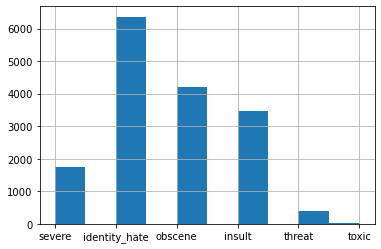

In [110]:
cleaned_df_cut = pd.cut(cleaned_df["toxicity"],
                               bins=[0, 1, 2, 3, 4, 5, np.nan],
                               labels=["identity_hate", "insult", "obscene", "severe", "threat", "toxic"])
cleaned_df_cut.hist()

### Part 3 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies).

### Part 4 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables).
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these.

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative?

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well.